リターンの平均値を計算

In [96]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

df = pd.read_csv('stk_nasdaq.csv', thousands=',')
df['日付け'] = pd.to_datetime(df['日付け'], format='%Y年%m月%d日')
df.set_index('日付け', inplace=True)
df.sort_index(inplace=True)
df.head()

,終値,始値,高値,安値,出来高,変化率 %
日付け,,,,,,
2000-01-03,4131.15,4186.19,4192.19,3989.71,-,1.52%
2000-01-04,3901.69,4020.00,4073.25,3898.23,-,-5.55%
2000-01-05,3877.54,3854.35,3924.21,3734.87,-,-0.62%
2000-01-06,3727.13,3834.44,3868.76,3715.62,-,-3.88%
2000-01-07,3882.62,3711.09,3882.67,3711.09,-,4.17%


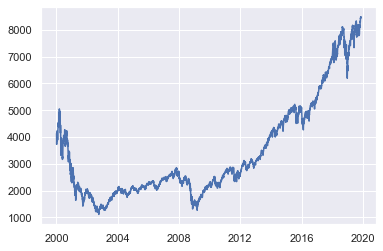

In [92]:
plt.plot(df.index, df.iloc[:,0])
plt.show()

In [93]:
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

start_date = date(2000,1,1)
end_date = date(2020,12,31)
delta_year = relativedelta(month=12)

df_index = df['終値'] / df.iloc[0,0]*100    # 最初の値で規格化
df_month = df_index.resample('M').first()
df_month.head()


日付け
2000-01-31    100.000000
2000-02-29     98.083584
2000-03-31    115.805042
2000-04-30    102.239812
2000-05-31     95.810610
Freq: M, Name: 終値, dtype: float64

In [109]:
df_month_return = df_month.pct_change().dropna()     # 月ごとの変動率を計算
df_month_return.head()

日付け
2000-02-29   -0.019164
2000-03-31    0.180677
2000-04-30   -0.117139
2000-05-31   -0.062884
2000-06-30   -0.094889
Freq: M, Name: 終値, dtype: float64

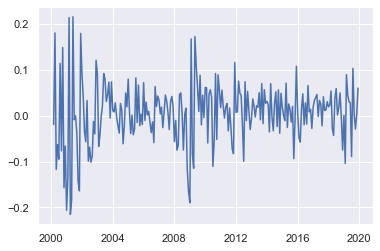

0.005293394415163218

In [110]:
plt.plot(df_month_return)
plt.show()
df_month_return.mean()

In [111]:
# 参考：https://investengblog.com/py_n225vssp500/#%E6%A0%AA%E4%BE%A1%E6%99%82%E7%B3%BB%E5%88%97%E6%AF%94%E8%BC%83

df_month_return_per_year = (1 + df_month_return.mean())**12 - 1
df_month_sd_per_year = np.sqrt(12) * df_month_return.std()

print(df_month_return_per_year )   # 年率リターン
print(df_month_sd_per_year)       # 年率リスク
print(df_month_return_per_year / df_month_sd_per_year)  # シャープレシオ

0.06540307717083715
0.23435567478180672
0.2790761402800666


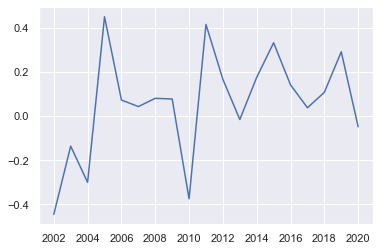

In [113]:
df_year = df_index.resample('Y').first()
df_year_return = df_year.pct_change().dropna()
plt.plot(df_year_return)
plt.show()

In [119]:
print(df_year_return.mean())
print(df_year_return.std())
print(df_year_return.mean() / df_year_return.std())

0.055920990428048246
0.24361059849330846
0.22955072880207342
